<a href="https://colab.research.google.com/github/3deminerali/super/blob/main/SuperResolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on code and tutorial in https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Super-**Resolution**
Please look at the original license.

In [ ]:
!git clone https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Super-Resolution.git

fatal: destination path 'a-PyTorch-Tutorial-to-Super-Resolution' already exists and is not an empty directory.


In [ ]:
%cd a-PyTorch-Tutorial-to-Super-Resolution
!gdown --id 1_PJ1Uimbr0xrPjE8U3Q_bG7XycGgsbVo

/content/a-PyTorch-Tutorial-to-Super-Resolution
Downloading...
From: https://drive.google.com/uc?id=1_PJ1Uimbr0xrPjE8U3Q_bG7XycGgsbVo
To: /content/a-PyTorch-Tutorial-to-Super-Resolution/checkpoint_srgan.pth.tar
101MB [00:00, 141MB/s] 


## **Please, change Runtime Type to GPU**

In [ ]:
import torch
from utils import *
from PIL import Image, ImageDraw, ImageFont

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Model checkpoints
srgan_checkpoint = "./checkpoint_srgan.pth.tar"

# Load models
srgan_generator = torch.load(srgan_checkpoint)['generator'].to(device)
srgan_generator.eval()

cuda


In [ ]:
!wget https://cdn.pixabay.com/photo/2018/06/09/02/32/donuts-3463531_640.jpg

In [ ]:
hr_img = Image.open('donuts-3463531_640.jpg', mode="r") # put any other file instead or make a loop going around a full folder
hr_img = hr_img.convert('RGB')
sr_img_srgan = srgan_generator(convert_image(hr_img, source='pil', target='imagenet-norm').unsqueeze(0).to(device))
sr_img_srgan = sr_img_srgan.squeeze(0).cpu().detach()
sr_img_srgan = convert_image(sr_img_srgan, source='[-1, 1]', target='pil')


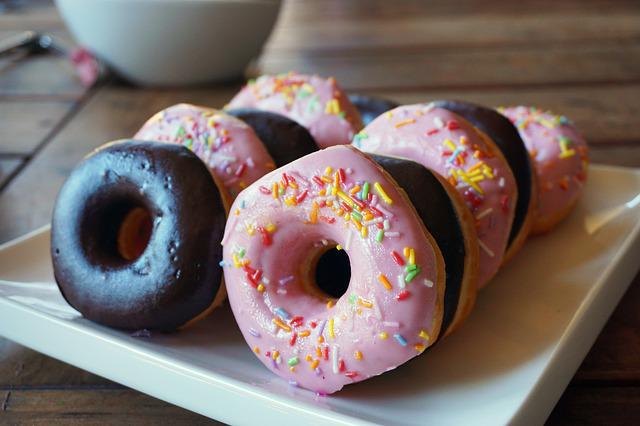

In [ ]:
hr_img

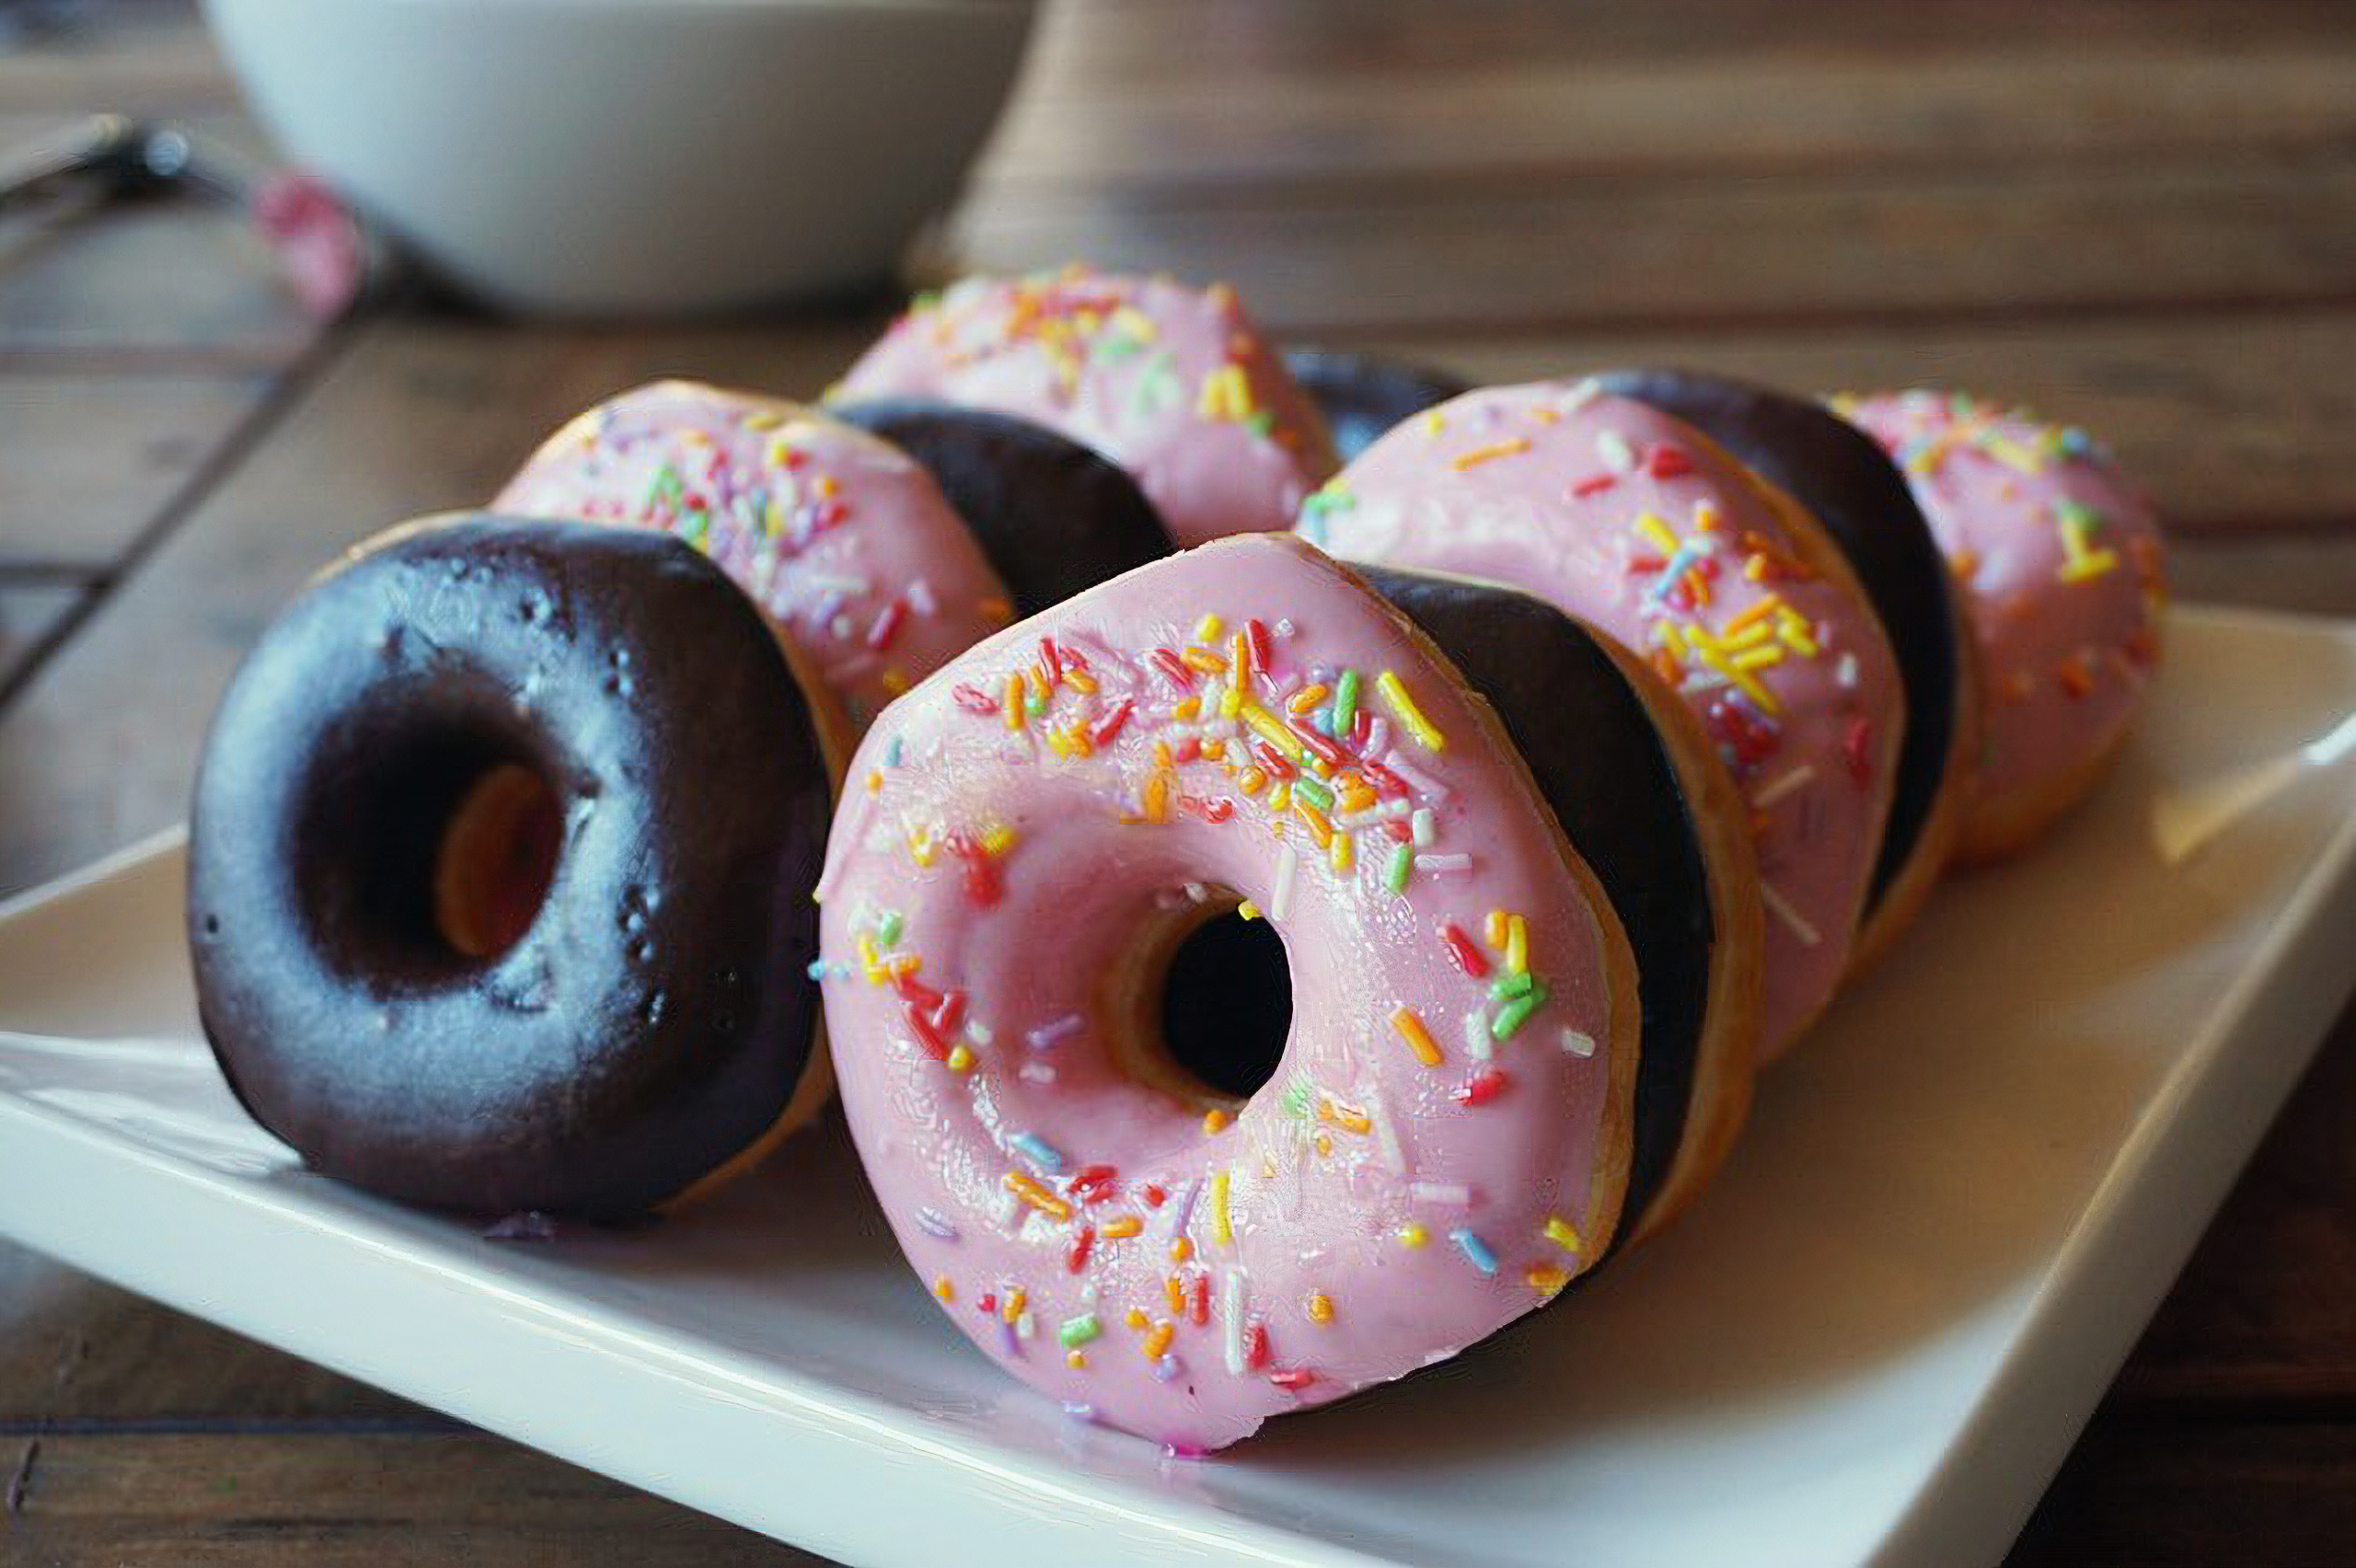

In [ ]:
sr_img_srgan